**<center> <h1>Academics Performance Prediction </h1> </center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,cohen_kappa_score,confusion_matrix,roc_auc_score,roc_curve

In [2]:
plt.rcParams["figure.figsize"] = [15,8]

In [3]:
import warnings
warnings.filterwarnings("ignore")

**<center><h1>Set options</h1></center>**

In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

**<center> <h1>Read Data</h1> </center>**

In [5]:
data = pd.read_csv(r"D:\Imarticus\ML\Supervised learning\Class Assesments(case study)- Supervised\Class Assesment 4 M.L -(LOGESTIC Regression)\xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
data.shape

(480, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [8]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [9]:
data.describe(include = object)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


### visualize and analyze the Categprical Features

In [10]:
categorical = data.select_dtypes(include = object)

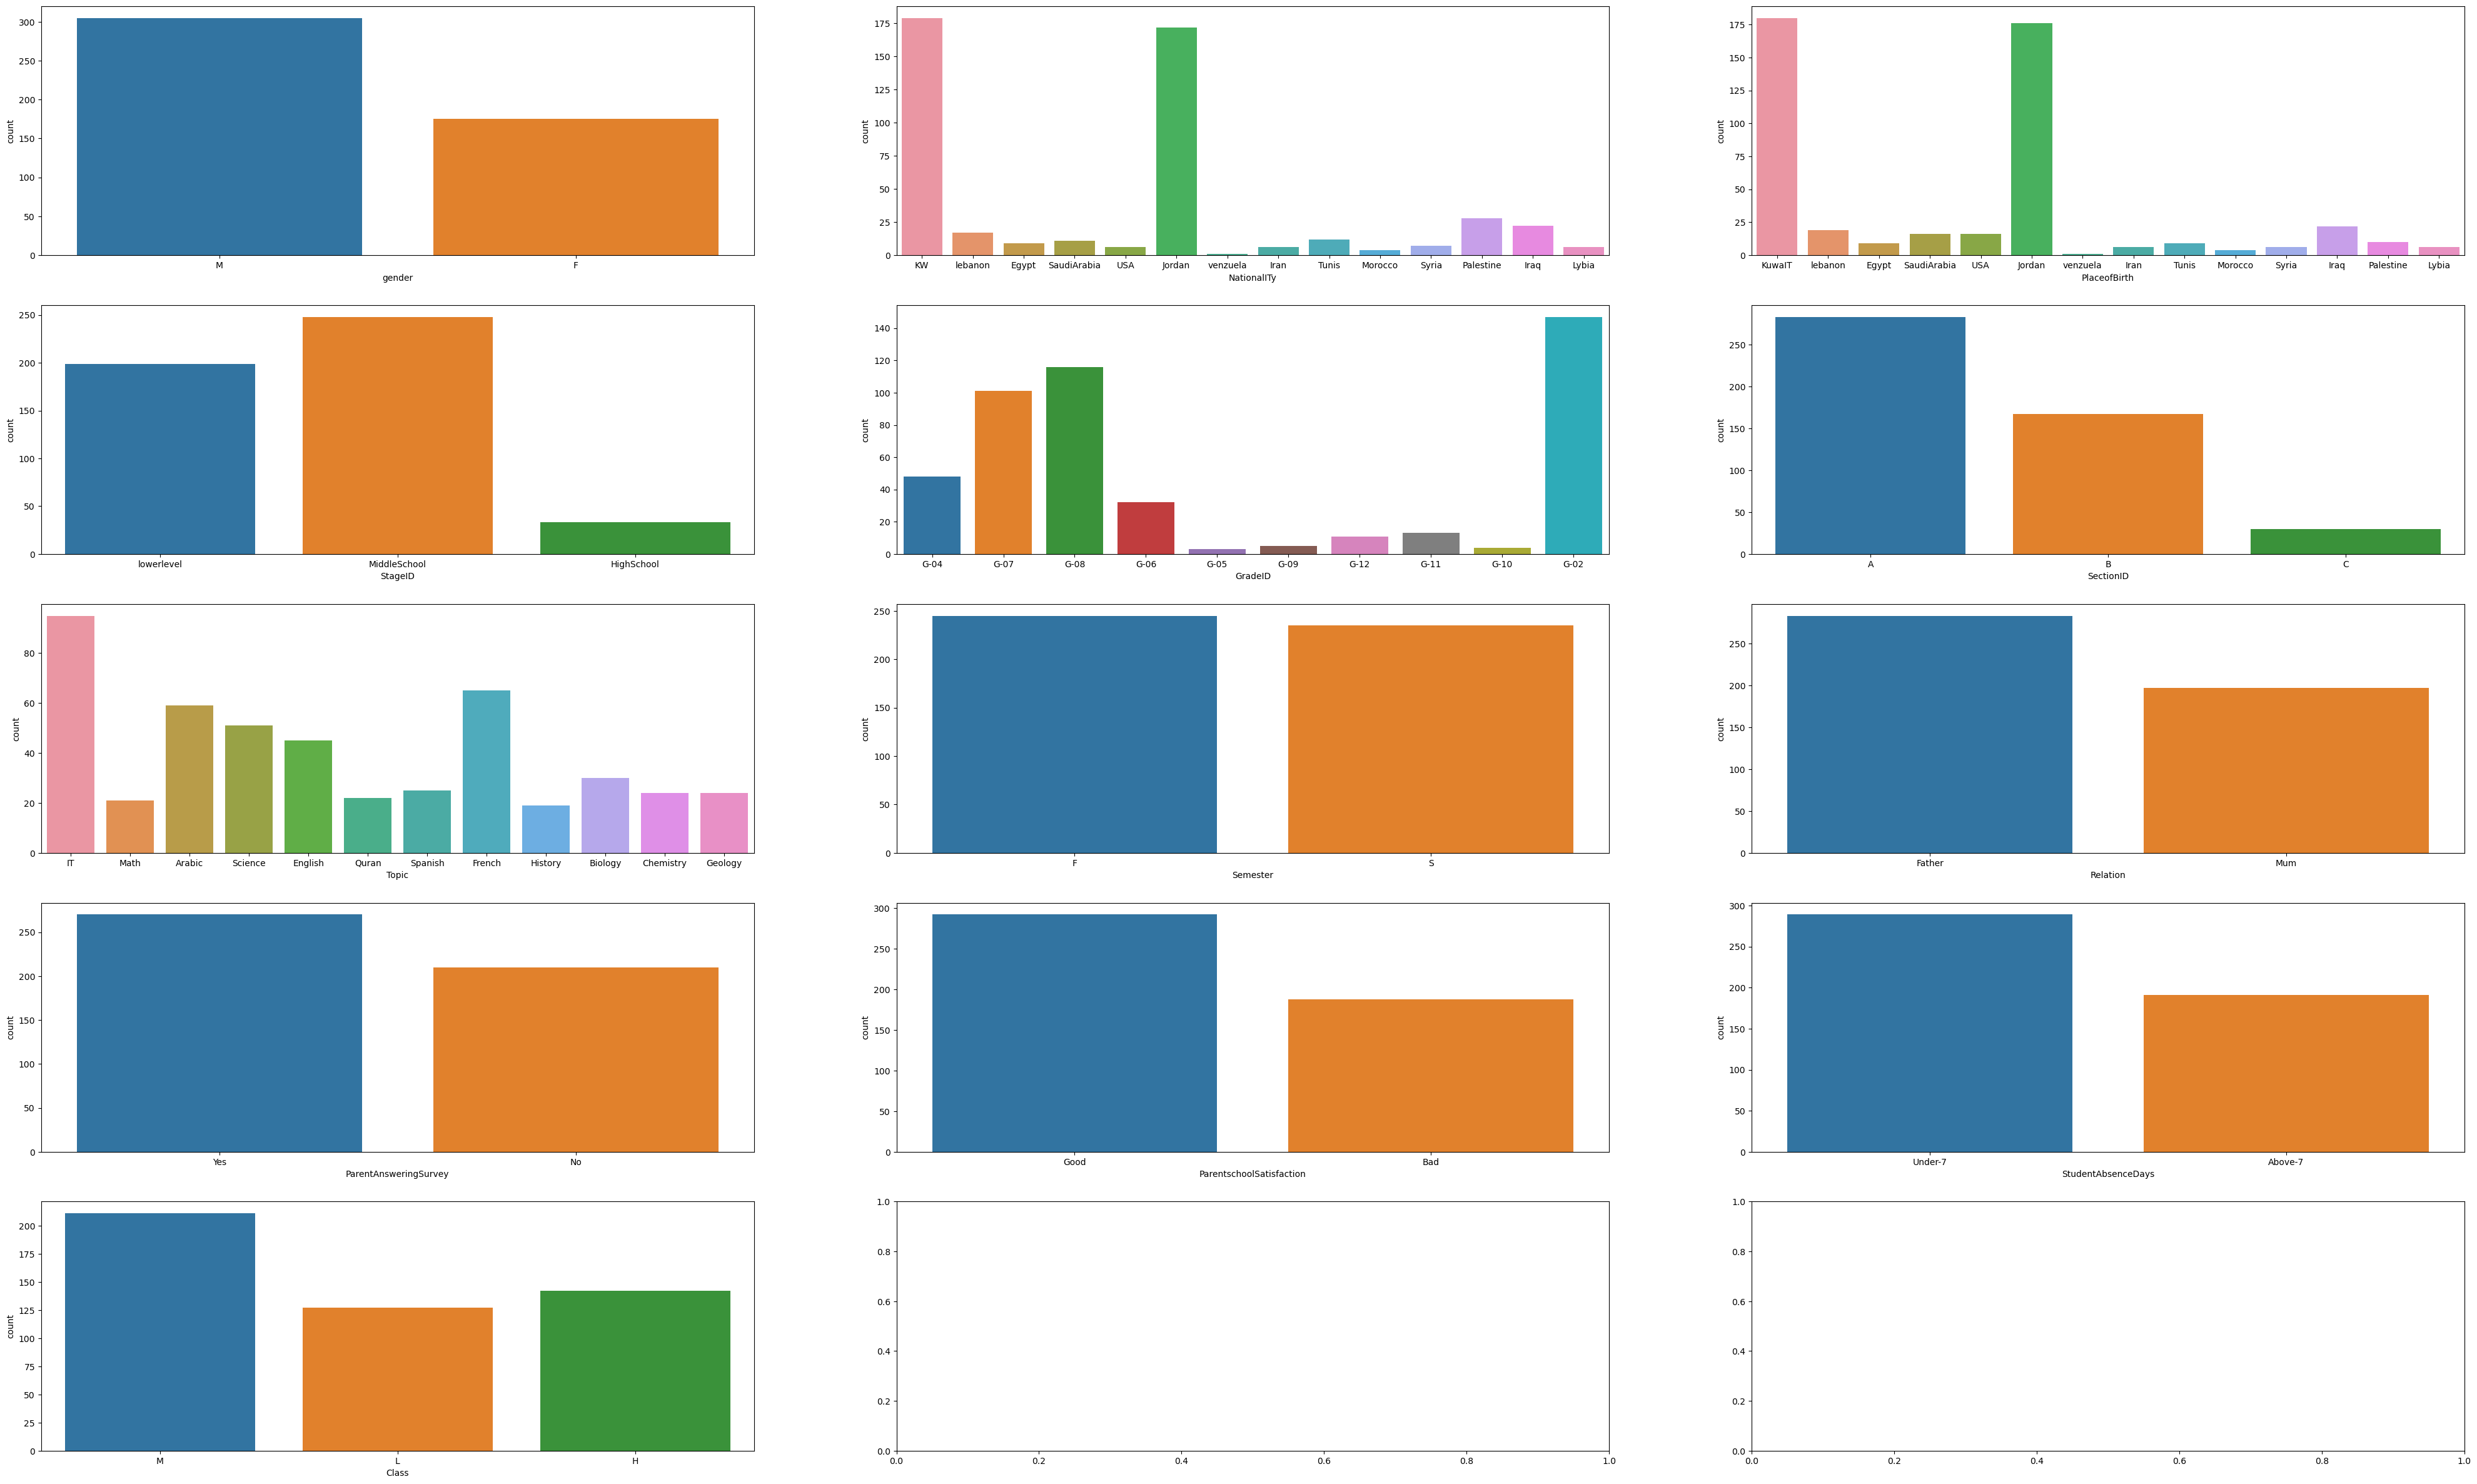

In [11]:
fig, ax = plt.subplots(nrows = 5,ncols = 3, figsize = (50,30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax = subplot)
plt.show()

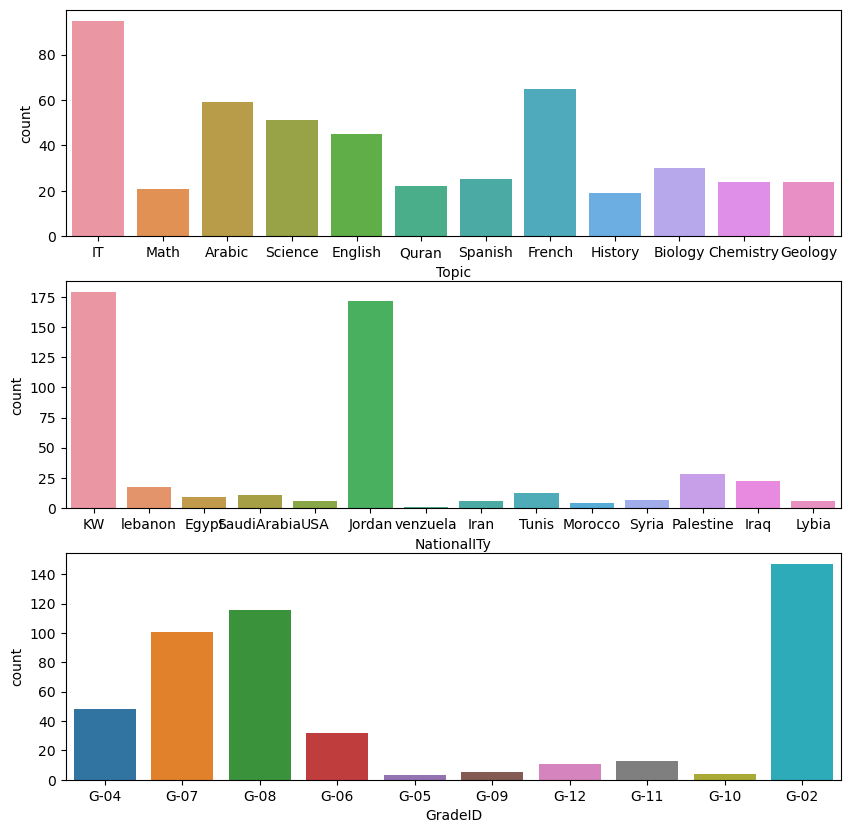

In [12]:
fig, (axis1, axis2,axis3)  = plt.subplots(3, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)
sns.countplot(x='GradeID', data=data, ax=axis3)
plt.show()

### Most of these countries are in the middle east(Islamic states), perhaps this explains the gender disparity

### Reading the Relation of Features with respect to gender

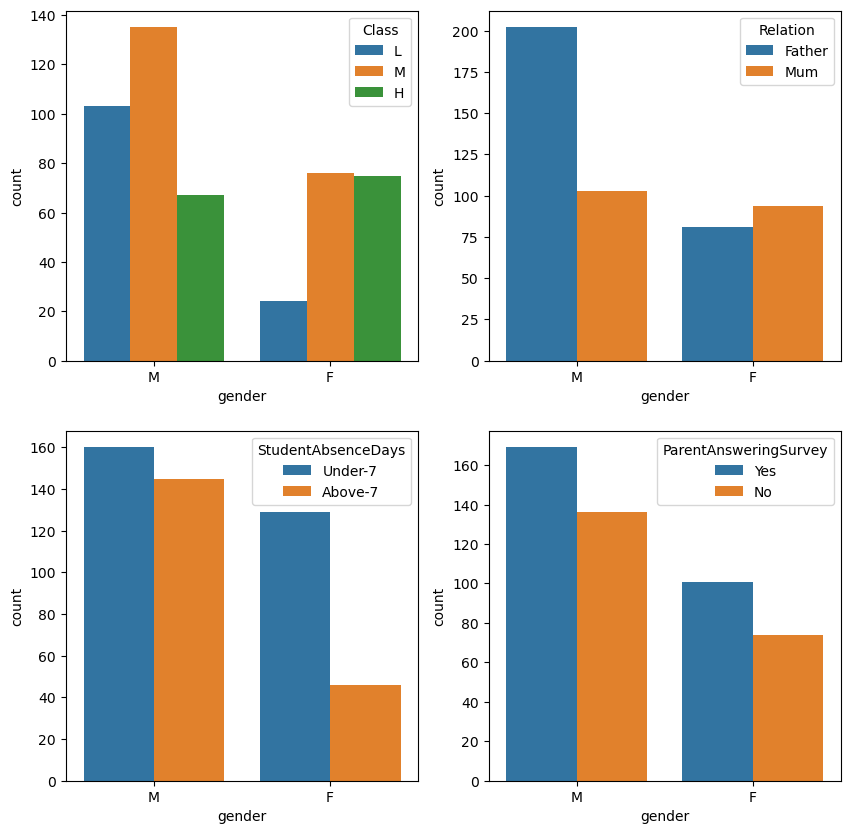

In [13]:
fig , ax = plt.subplots(2,2,figsize = (10,10))
sns.countplot(x = "gender",hue = "Class", data = data, ax= ax[0,0],order = ["M","F"],hue_order = ["L","M","H"])
sns.countplot(x = "gender",hue = "Relation", data = data, ax= ax[0,1],order = ["M","F"])
sns.countplot(x = "gender",hue = "StudentAbsenceDays", data = data, ax= ax[1,0],order = ["M","F"])
sns.countplot(x = "gender",hue = "ParentAnsweringSurvey", data = data, ax= ax[1,1],order = ["M","F"])
plt.show()

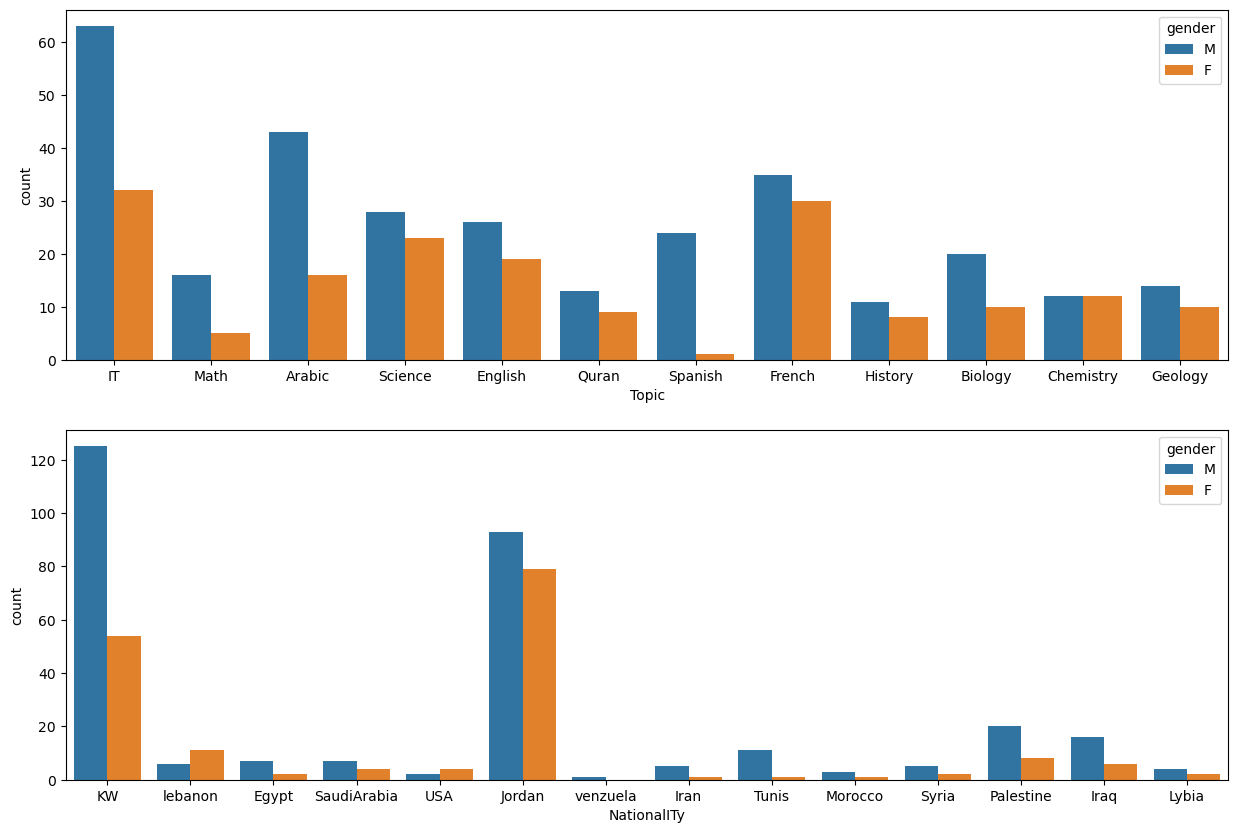

In [14]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)
plt.show()

### Visualize the class with diffrent continious type of variable

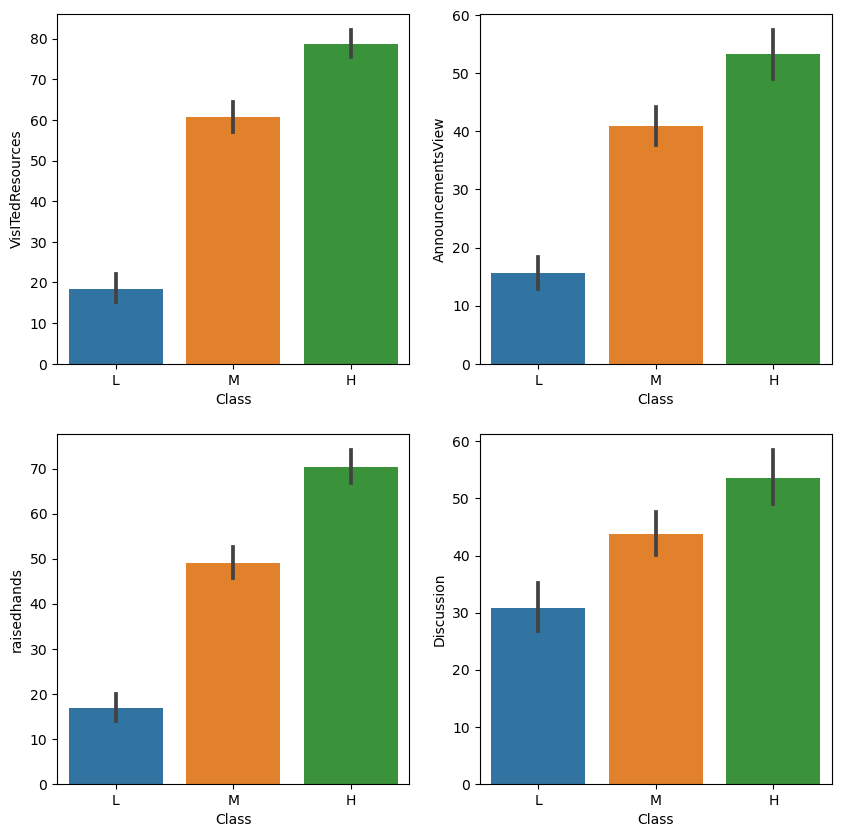

In [15]:
fig, ax  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=ax[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=ax[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=ax[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=ax[1,1])
plt.show()

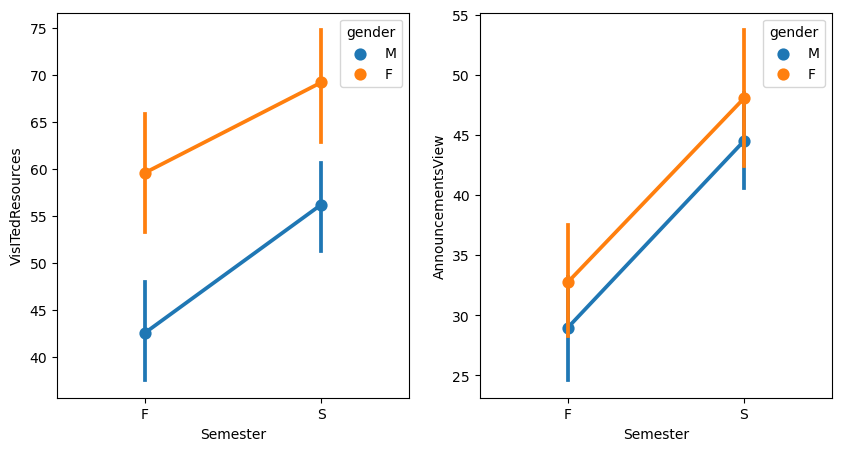

In [16]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)
plt.show()

In [17]:
average_raisedhand = sum(data.raisedhands)/len(data.raisedhands)

### outlier

In [18]:
average_VisitedResources = sum(data.VisITedResources)/len(data.VisITedResources)
average_AnnouncementsView = sum(data.AnnouncementsView)/len(data.AnnouncementsView)
unusul = data.loc[(data.raisedhands >= average_raisedhand) & (data.VisITedResources >= average_VisitedResources) 
                  & (data.AnnouncementsView >= average_AnnouncementsView) & (data.Class == "L")]

In [19]:
unusul

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [20]:
data["numeric_class"] = [1 if data.loc[i,"Class"] == "L" else 2 if data.loc[i,"Class"] =="M" else 3 
                        for i in range(len(data))]

In [21]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M,2
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L,1
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M,2
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M,2
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M,2


In [22]:
Male_Avg_grd = sum(data[data.gender=="M"].numeric_class)/float(len([data.gender == "M"]))
female_Avg_grd = sum(data[data.gender=="F"].numeric_class)/float(len([data.gender == "F"]))

In [23]:
Male_Avg_grd

574.0

In [24]:
female_Avg_grd

401.0

In [25]:
nation = data.NationalITy.unique()

In [26]:
nation

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [27]:
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]

<AxesSubplot:>

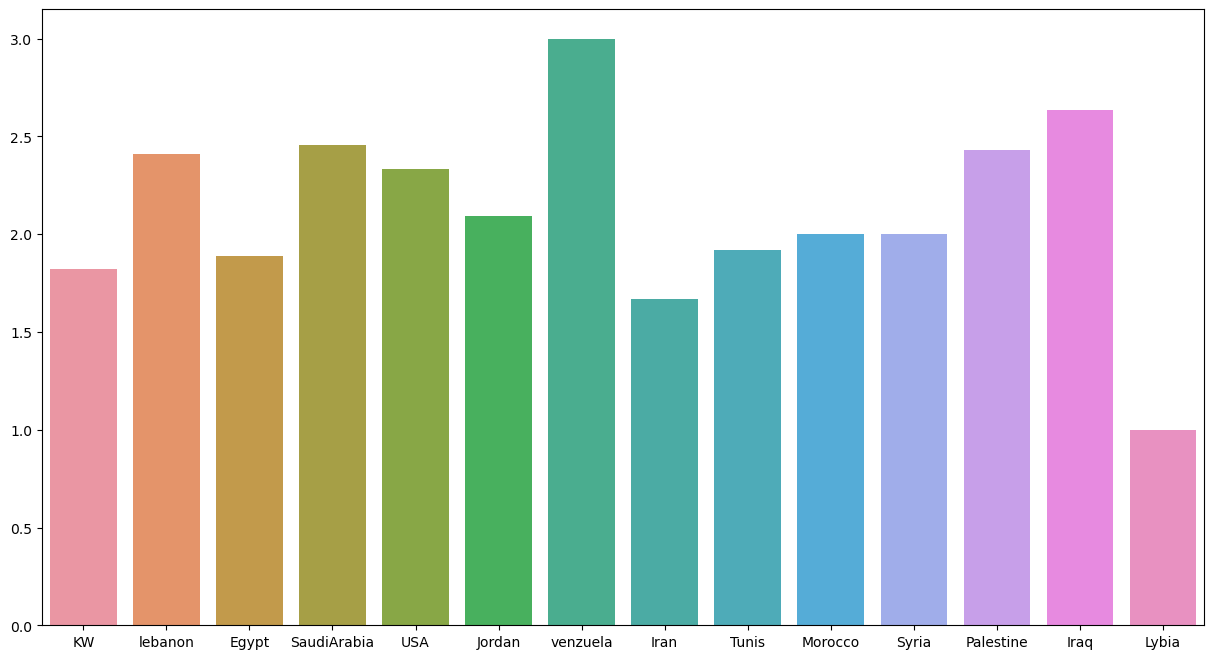

In [28]:
sns.barplot(x = nation,y=nation_grades_ave)

In [29]:
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy ==
                                                                                  'Jordan']))
print('Jordan average: '+str(jordan_ave))

Jordan average: 2.0930232558139537


In [30]:
sum(data[data.NationalITy == "Jordan"].numeric_class)

360

In [31]:
len(data[data.NationalITy=="Jordan"])

172

 As it can be seen in bar plot Jordan is sixth country with average 2.09 so 'Jordan' has positive impact on these two students actually

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

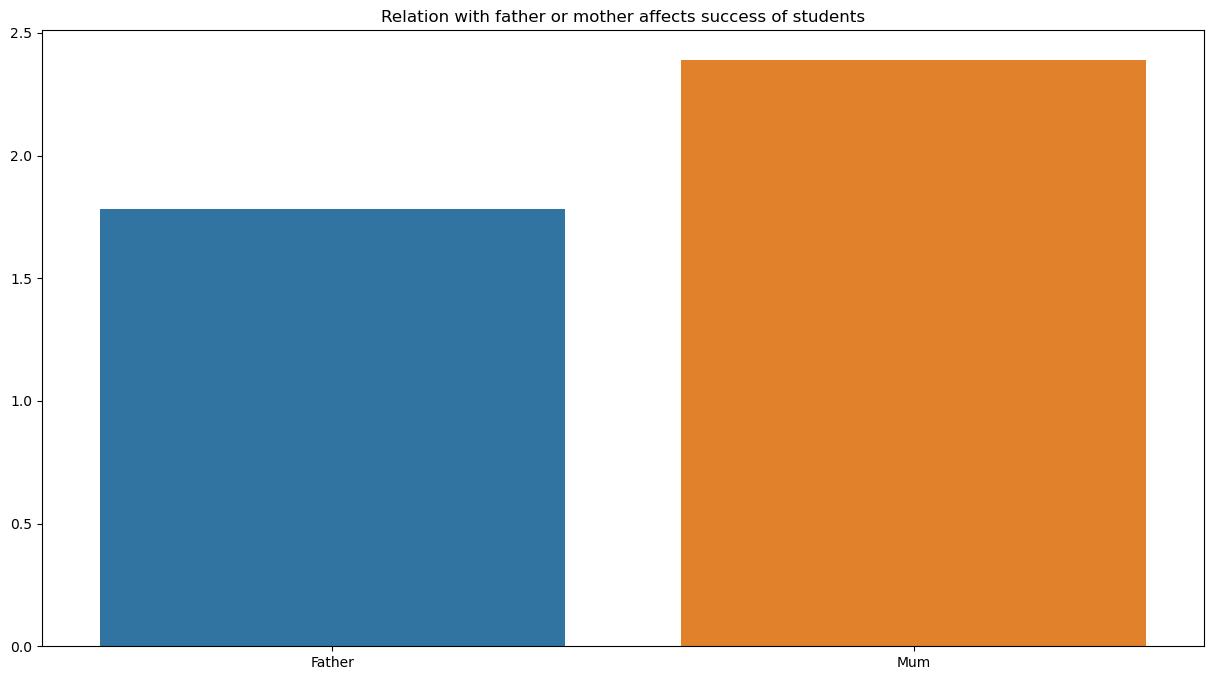

In [32]:
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i]))
                      for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

In [34]:
absence_days = data.StudentAbsenceDays.unique()
absence_days

array(['Under-7', 'Above-7'], dtype=object)

In [36]:
Avg_absence_days = [sum(data[data.StudentAbsenceDays == i].numeric_class)/len(data[data.StudentAbsenceDays == i]) for i in absence_days]

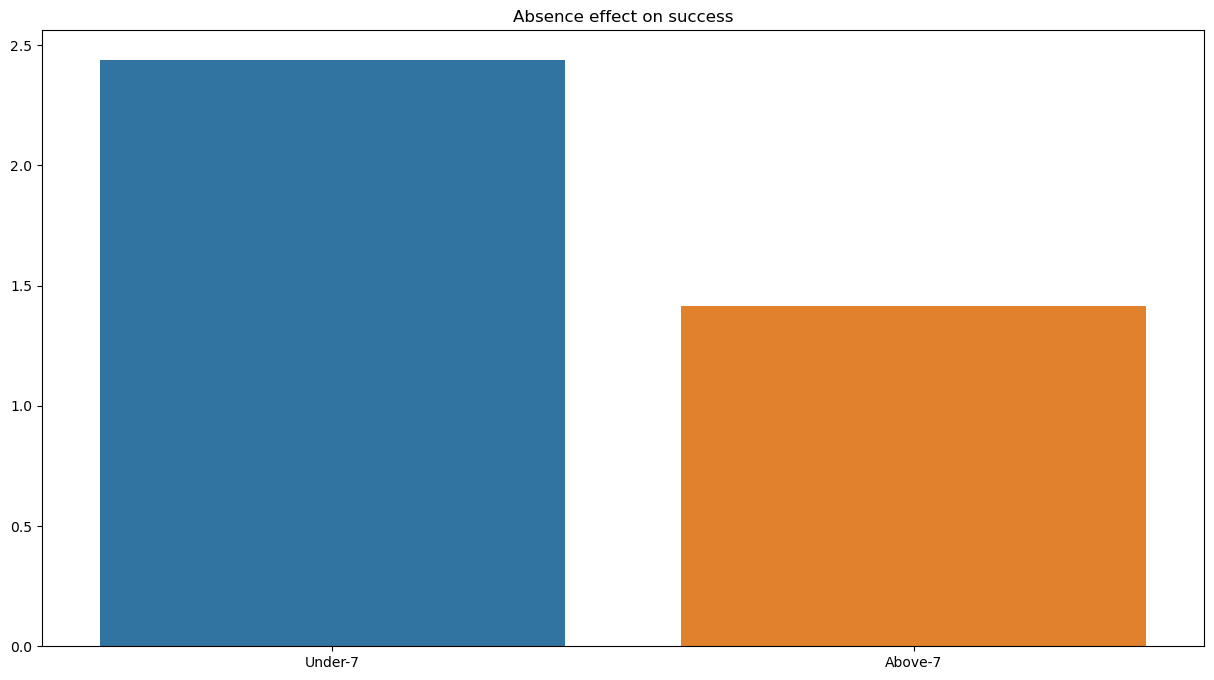

In [41]:
ax = sns.barplot(x=absence_days, y=Avg_absence_days)
plt.title('Absence effect on success')
plt.show()

### Model Building

In [42]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [43]:
data1 = data.drop("Class",axis = 1)

In [45]:
dummy_data = pd.get_dummies(data1, drop_first = True)

In [47]:
dummy_data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
Ind_variable = dummy_data.drop("numeric_class",axis = 1)
Target_variable = dummy_data["numeric_class"]

In [49]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(Ind_variable)

StandardScaler()

In [51]:
X = scale.fit_transform(Ind_variable)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Target_variable, test_size=0.3, random_state=10)

In [54]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [55]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [56]:
Prediction

array([3, 2, 2, 1, 2, 3, 3, 2, 2, 1, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3, 1, 2,
       2, 3, 2, 1, 3, 3, 2, 3, 3, 3, 1, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 1,
       2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 1, 3, 1, 1, 2, 2, 1, 2,
       3, 2, 2, 1, 2, 2, 3, 2, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1,
       2, 3, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2], dtype=int64)

In [57]:
Score

0.75

In [59]:
print(Report)

              precision    recall  f1-score   support

           1       0.85      0.74      0.79        39
           2       0.75      0.74      0.75        70
           3       0.66      0.77      0.71        35

    accuracy                           0.75       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.76      0.75      0.75       144

